**Prática de Histogramas**

1)
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente.
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


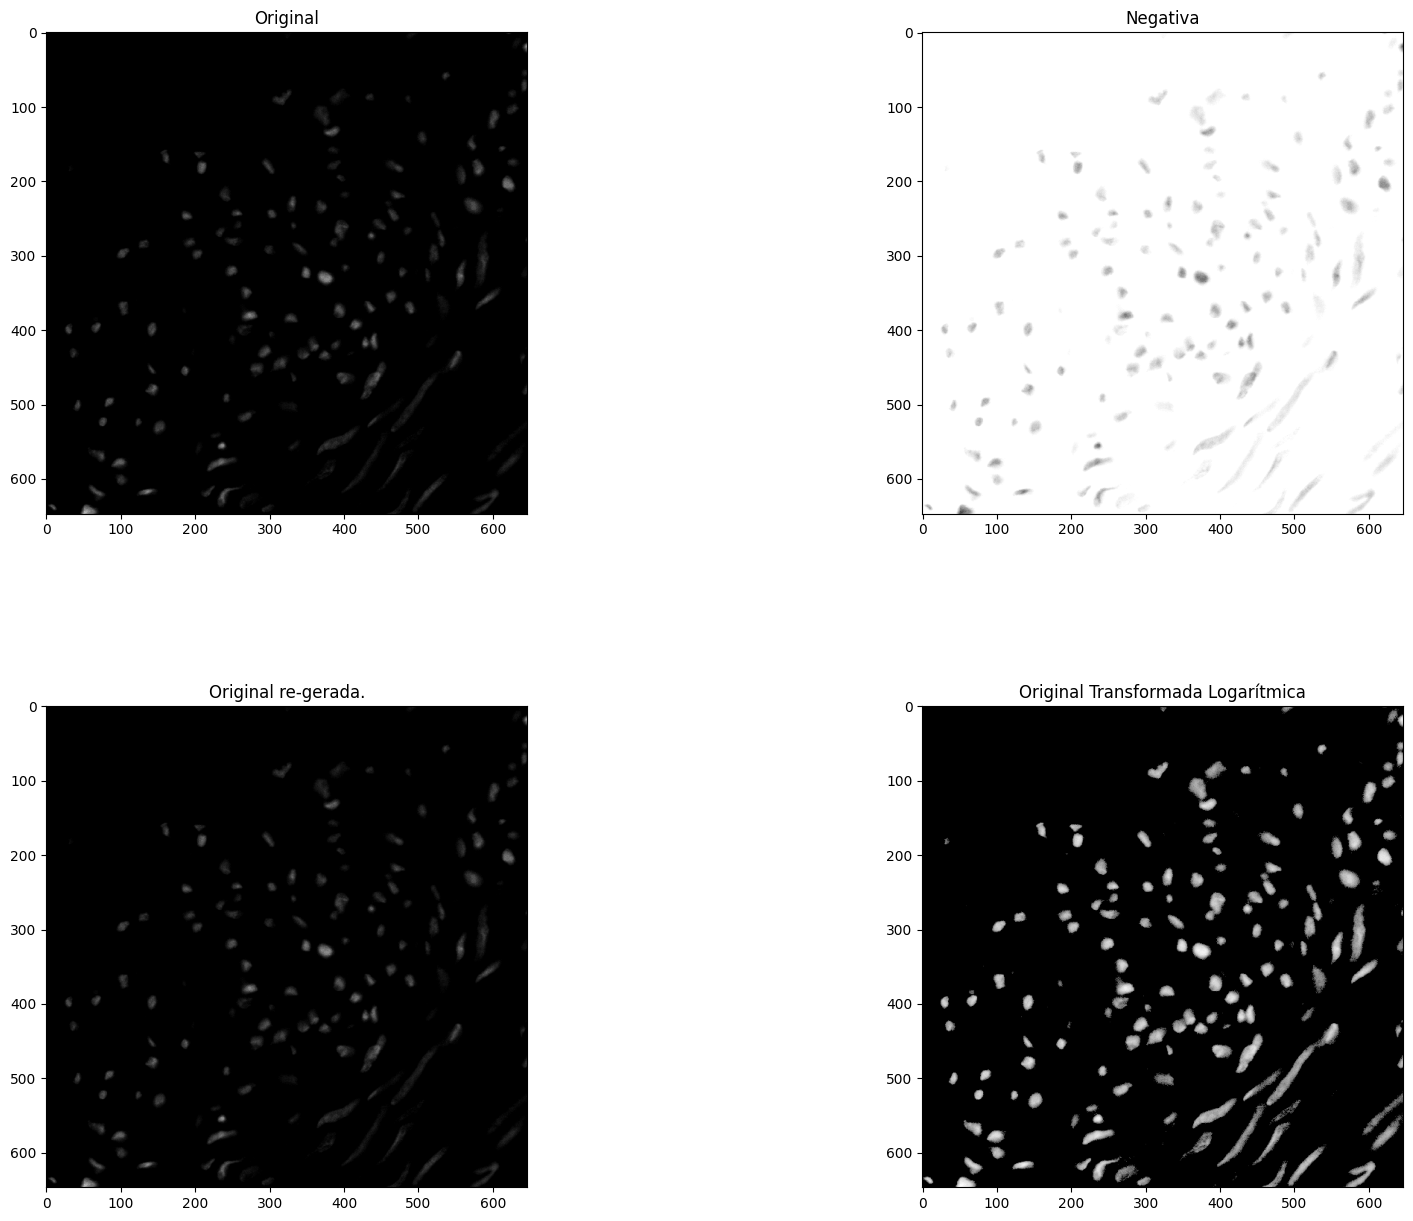

Na imagem original é mais fácil perceber os objetos presentes. Isso ocorre pois há maior contraste entre os objetos e o fundo na imagem original do que na imagem negativa.

In [15]:

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Markdown

uploaded = files.upload()

file_name = next(iter(uploaded))


img = Image.open(f"/content/{file_name}")

img_array = np.array(img)

negative_img = 255 - img_array
regenerated_img = 255 - negative_img


c = 255 / np.log(1 + np.max(img_array))  
log_image = c * np.log(1 + img_array)
log_image = np.array(log_image, dtype=np.uint8)  




plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 2)
plt.title('Negativa')
plt.imshow(negative_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 3)
plt.title('Original re-gerada.')
plt.imshow(regenerated_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 4)
plt.title('Original Transformada Logarítmica')
plt.imshow(log_image, cmap='gray', vmin=0, vmax=255)



plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

display(Markdown("Na imagem original é mais fácil perceber os objetos presentes. Isso ocorre pois há maior contraste entre os objetos e o fundo na imagem original do que na imagem negativa."))

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



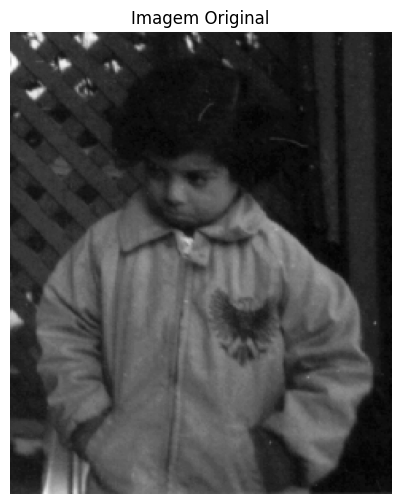

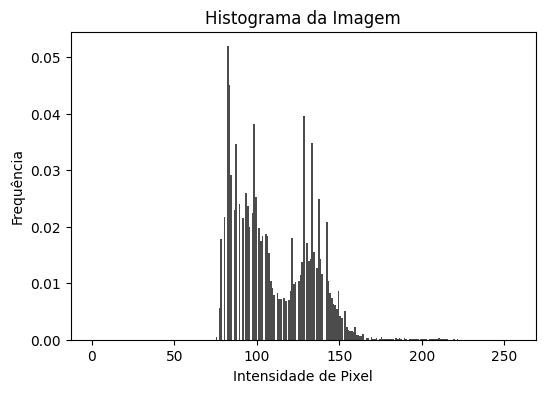

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Abra a imagem 'pout.tif' usando OpenCV
image = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# Mostre a imagem original
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Calcule o histograma
plt.figure(figsize=(6, 4))
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='black', alpha=0.7)
plt.title('Histograma da Imagem')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Frequência')
plt.show()

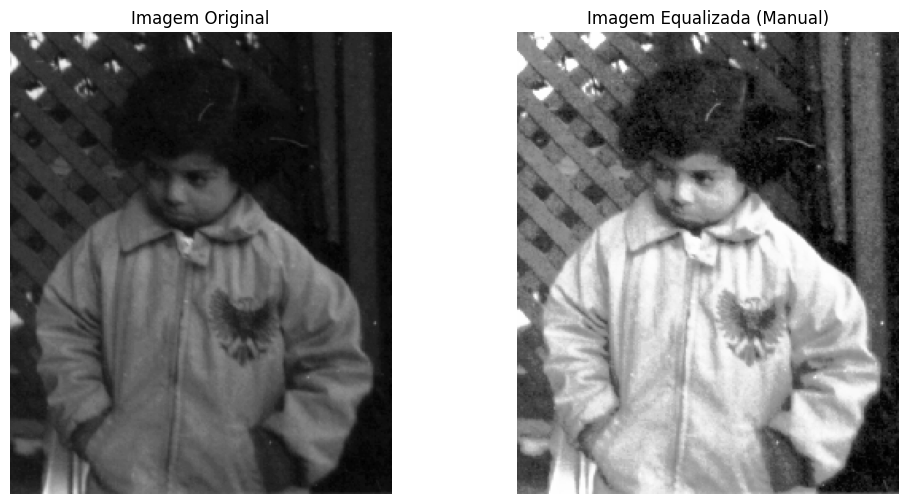

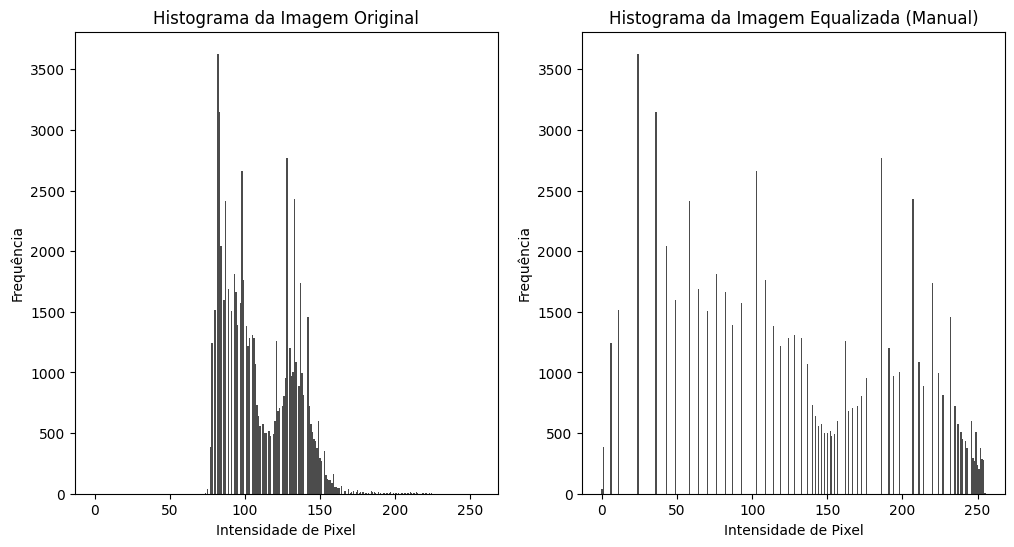

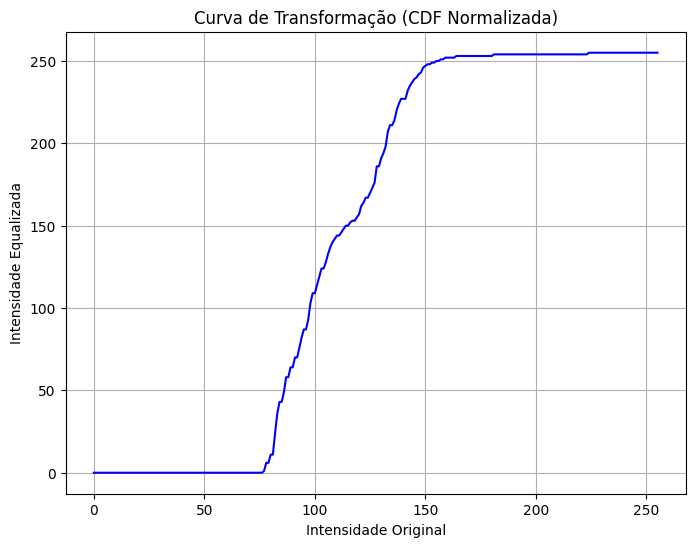

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o histograma manualmente
def calcular_histograma(imagem):
    histograma = np.zeros(256, dtype=int)
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            intensidade = imagem[i, j]
            histograma[intensidade] += 1
    return histograma

# Função para calcular a CDF (Curva de Distribuição Acumulada) e normalizá-la
def calcular_cdf_normalizada(histograma):
    cdf = np.cumsum(histograma)  # CDF é a soma acumulada do histograma
    cdf_normalizada = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())  # Normalização para 0-255
    return cdf_normalizada.astype(np.uint8)  # Converter para valores inteiros de 8 bits

# Função para aplicar a equalização de histograma manualmente
def equalizar_histograma(imagem):
    histograma = calcular_histograma(imagem)  # Calcula o histograma da imagem
    cdf_normalizada = calcular_cdf_normalizada(histograma)  # Obtém a CDF normalizada
    # Aplica a CDF normalizada à imagem original para gerar a imagem equalizada
    imagem_equalizada = cdf_normalizada[imagem]  # Mapeia cada valor de intensidade
    return imagem_equalizada, cdf_normalizada

# Carregar a imagem em escala de cinza
image = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# Equalização de histograma manual
imagem_equalizada_manual, cdf_normalizada = equalizar_histograma(image)

# Mostrar a imagem original e a equalizada manualmente lado a lado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_equalizada_manual, cmap='gray')
plt.title('Imagem Equalizada (Manual)')
plt.axis('off')

plt.show()

# Exibir os histogramas da imagem original e da imagem equalizada
histograma_original = calcular_histograma(image)
histograma_equalizado = calcular_histograma(imagem_equalizada_manual)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(256), histograma_original, color='black', alpha=0.7)
plt.title('Histograma da Imagem Original')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.bar(range(256), histograma_equalizado, color='black', alpha=0.7)
plt.title('Histograma da Imagem Equalizada (Manual)')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Frequência')

plt.show()

# Exibir a curva de transformação (CDF normalizada)
plt.figure(figsize=(8, 6))
plt.plot(cdf_normalizada, color='blue')
plt.title('Curva de Transformação (CDF Normalizada)')
plt.xlabel('Intensidade Original')
plt.ylabel('Intensidade Equalizada')
plt.grid(True)
plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

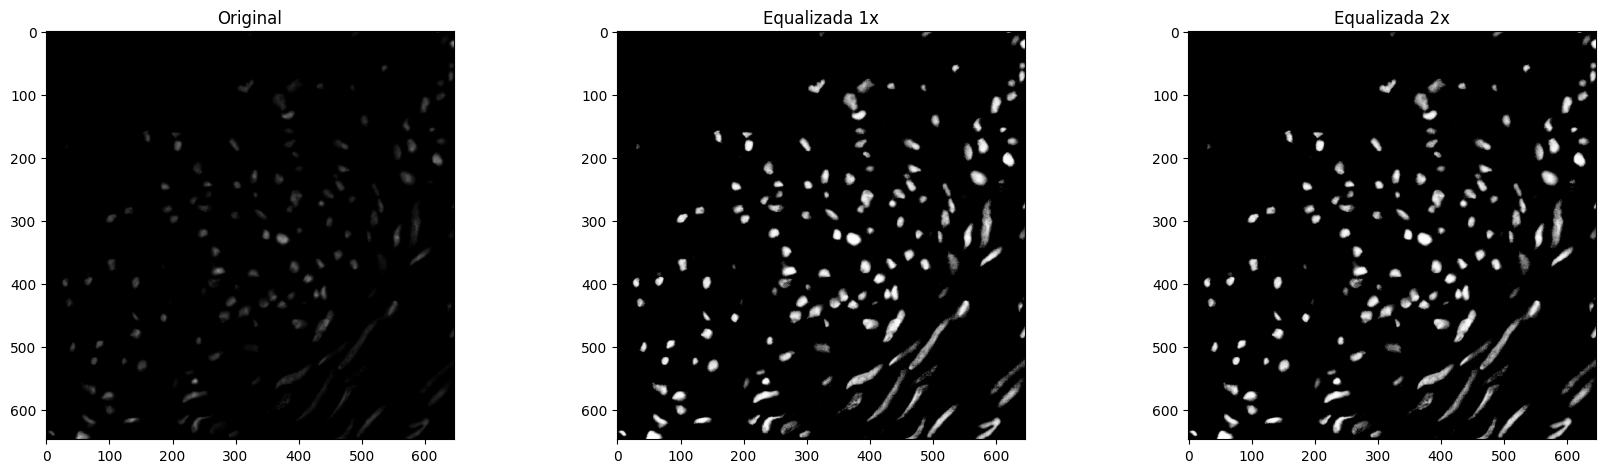

In [19]:
from google.colab import files
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


uploaded = files.upload()

file_name = next(iter(uploaded))
img = Image.open(f"/content/{file_name}").convert('L')
img_array = np.array(img)

def calcular_histograma(imagem):
    histograma = np.zeros(256, dtype=int)
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            intensidade = imagem[i, j]
            histograma[intensidade] += 1
    return histograma

def calcular_cdf_normalizada(histograma):
    cdf = np.cumsum(histograma)  
    cdf_normalizada = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())  
    return cdf_normalizada.astype(np.uint8) 


def equalizar_histograma(imagem):
    histograma = calcular_histograma(imagem)  
    cdf_normalizada = calcular_cdf_normalizada(histograma)  
    
    imagem_equalizada = cdf_normalizada[imagem]  
    return imagem_equalizada




equalizada_1x = equalizar_histograma(img_array)

equalizada_2x = equalizar_histograma(equalizada_1x)

plt.figure(figsize=(20, 15))

# original
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)

# equalizada 1x
plt.subplot(1, 3, 2)
plt.title('Equalizada 1x')
plt.imshow(equalizada_1x, cmap='gray', vmin=0, vmax=255)

# equalizada 2x
plt.subplot(1, 3, 3)
plt.title('Equalizada 2x')
plt.imshow(equalizada_2x, cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(wspace=0.4)
plt.show()